## Project Overview

Hop is an automated waste management system designed to help healthcare workers smoothen the sorting of composite and single material waste for recycling. Developed by Team Hooper, this project aims to enhance recycling processes within healthcare facilities by leveraging advanced object recognition technologies.


### Code Documentation

This section contains the proof of concept for the object recognition model used in the Hop project by Team Hooper. The model is designed for an automated waste management system, focusing on improving recycling processes in healthcare facilities by distinguishing between composite and single-material waste. 

Here, we would like to demonstrate on different levels of objective recognition capabilities that we can build in the future, from image, video, web camera and eventually export the module onto our ESP32 Camera.

In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
# Testing using the pre-trained model using OpenCV's DNN module

config_file = "src/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "src/frozen_inference_graph.pb"
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
# Initialize the list to store class labels available from the pre-trained model

class_labels = []
file_name = "src/labels.txt"
with open(file_name, 'rt') as fpt:
    class_labels = fpt.read().rstrip('\n').split("\n")

print(class_labels)
print(len(class_labels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [5]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x285cd8a70>

### Reading An Image
This section demonstrates how to read and display an image for object detection.


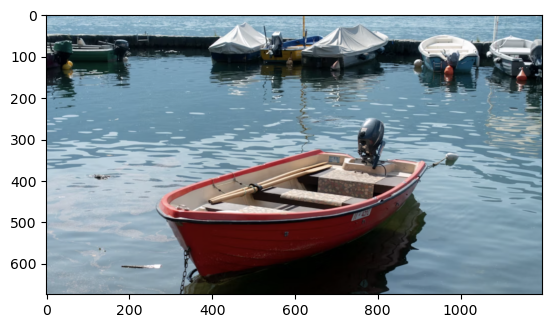

In [6]:
img = cv2.imread("images/boat.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # rgb

In [7]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.6)
print(ClassIndex)

[9]


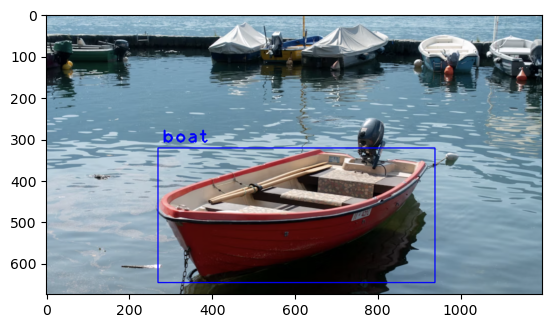

In [8]:
# Display output
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, class_labels[ClassInd - 1], (boxes[0]+10, boxes[0]+40), font, fontScale=font_scale, color=(255, 0, 0), thickness=3)
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # rgb

### Object Recognition

This section introduces a different approach to object recognition using a our own model build from Roboflow.


In [9]:
import cv2
from inference import get_roboflow_model

# Define the image file to use for inference
image_file = "images/test.png"
image = cv2.imread(image_file)

# Load a pre-trained model
model = get_roboflow_model("plastic-paper-composite/2")
results = model.infer(image)

# Create a dictionary to map class IDs to class names
class_names = {
    "4": "paper",
    # Add other class IDs and names as needed
}

# Assuming 'image' is your input image loaded previously
annotated_image = image.copy()

# Extract classification results
class_id = list(results[0].predictions.keys())[0]  # Extract class ID from predictions
confidence = results[0].predictions[class_id].confidence  # Extract confidence
predicted_classes = results[0].predicted_classes  # Extract predicted classes

# Use the class_names dictionary to get the descriptive class name
class_name = class_names.get(predicted_classes[0], "Unknown")

text = f"Class: {class_name}, Confidence: {confidence:.2f}"
cv2.putText(annotated_image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the annotated image
cv2.imshow("Inference result", annotated_image)
key = cv2.waitKey(0)  # Wait indefinitely for a key press
if key == ord('q'):
    cv2.destroyAllWindows()


/Users/evanyan13/anaconda3/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


: 

### Web Cam Capture
This section demonstrates how to use a webcam for real-time object detection using YOLO.


In [5]:
from ultralytics import YOLO
import cv2
import math

# start webcam
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

# model
model = YOLO("yolo-Weights/yolov8n.pt")

# object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "plastic", "keyboard", "plastic",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

while True:
    success, img = cap.read()
    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 77.8ms
Speed: 2.6ms preprocess, 77.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.86
Class name --> person
0: 480x640 1 person, 101.3ms
Speed: 2.3ms preprocess, 101.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.84
Class name --> person
Confidence ---> 0.26
Class name --> sofa
0: 480x640 1 person, 1 couch, 84.2ms
Speed: 1.6ms preprocess, 84.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.85
Class name --> person
0: 480x640 1 person, 65.1ms
Speed: 1.3ms preprocess, 65.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.86
Class name --> person
0: 480x640 1 person, 66.1ms
Speed: 1.4ms preprocess, 66.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

Confidence ---> 0.86
Class name --> person
0: 480x640 1 person, 66.8ms
Speed: 1.5ms preprocess, 66.8ms inference, 1.1ms postprocess per im

: 